In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import Chem
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs

/home/gonzalo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


This is an script to analyze the output of experiment 6-2 (myrunexp6.py). The CMD was run to create doubly-conditioned molecules (logp = 0.5 and similarity with first centroid = 1). This needed a modification of SSAV to deal with multiple conditioning sampling (uses mySSAV.py file). It used as input the original dataset.

In [2]:
##########################################################
## Analysis of the conditioned output
##########################################################

# Init the time counter for the whole notebook
start = time.time()

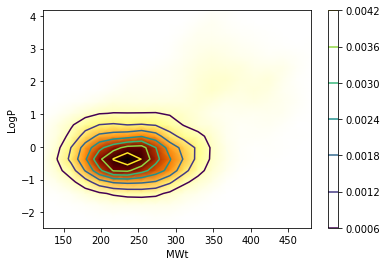

In [3]:
# 2D plot of MW vs logP of output set
smis = mf.smif2smis('./con2b-300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smis = list(set(smis))
nun = len(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)
smidf_prop = smidf[["mwt","logp"]]
mf.bidiplot(np.asarray(smidf_prop), "MWt","LogP", d = True)

In [4]:
# Find correct and unique structures
print(n, ncorr, nun)

(10000, 9710, 2693)


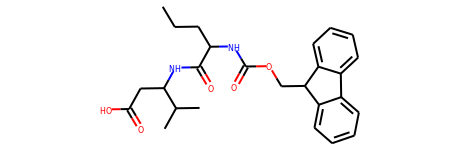

In [5]:
# Add column of similarity to first cetroid in input set and plot the distribution
# Strucure of the first centroud
query = Chem.MolFromSmiles('CCCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)NC(CC(=O)O)C(C)C')
query

Text(0,0.5,'# molecules')

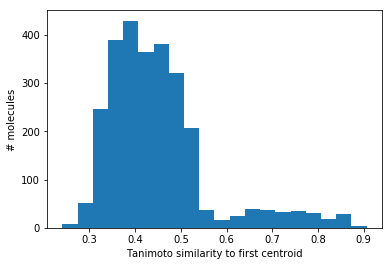

In [6]:
smidf['fp'] = smidf['mol'].apply(FingerprintMols.FingerprintMol)
q_fp = FingerprintMols.FingerprintMol(query)
smidf['sim'] = smidf.fp.apply(lambda x: DataStructs.FingerprintSimilarity(x,q_fp))
plt.hist(smidf.sim, bins = 20)
plt.xlabel("Tanimoto similarity to first centroid")
plt.ylabel("# molecules")

In [7]:
# Cluster the unique structures and visualize
smidf_s = smidf[["smiles","id"]]
cls = mf.clusmidf(smidf)
cl_smis_co = []
for i in range(10):
    cl = cls[i]
    smis = [smidf.loc[smidf["id"] == i, "smiles"].iloc[0] for i in cl]
    cl_smis_co.append(smis)

Clustering time: 00:00:10


,smiles,id,mol,mwt,logp,fp,sim
0,CCOC(=O)NC(CC(=O)OCC(=O)OCC)C(=O)OCC,s1,"<img src="""" alt=""Mol""/>",319.310,0.1606,"[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, ...]",0.394913
1,CNCC1CCNCCN1C,s2,"<img src="""" alt=""Mol""/>",157.261,-0.5005,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, ...]",0.458167
2,O=C(O)CNC(=O)C1CC(NC(=O)OCC2c3ccccc32)C1,s3,"<img src="""" alt=""Mol""/>",318.329,0.8375,"[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, ...]",0.534556
3,O=C(CCN1CCOCC1)NCCO,s4,"<img src="""" alt=""Mol""/>",202.254,-1.1828,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, ...]",0.480159
4,CCC(C)NC(=O)C(CC(N)=O)NC(=O)OCC,s5,"<img src="""" alt=""Mol""/>",259.306,-0.1088,"[0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...]",0.492625

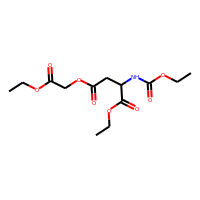
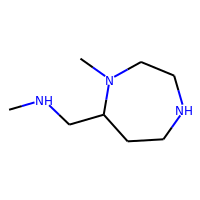
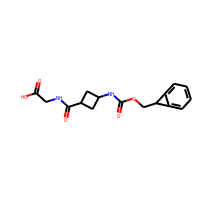
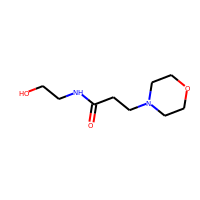
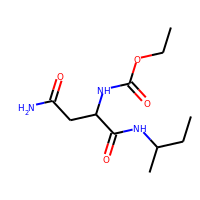

In [8]:
smidf.head()

In [9]:
len(cls)

1622

/home/gonzalo/anaconda3/envs/cix/lib/python2.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:172: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn("Truncating the list of molecules to be displayed to %d. Change the maxMols value to display more."%(maxMols))


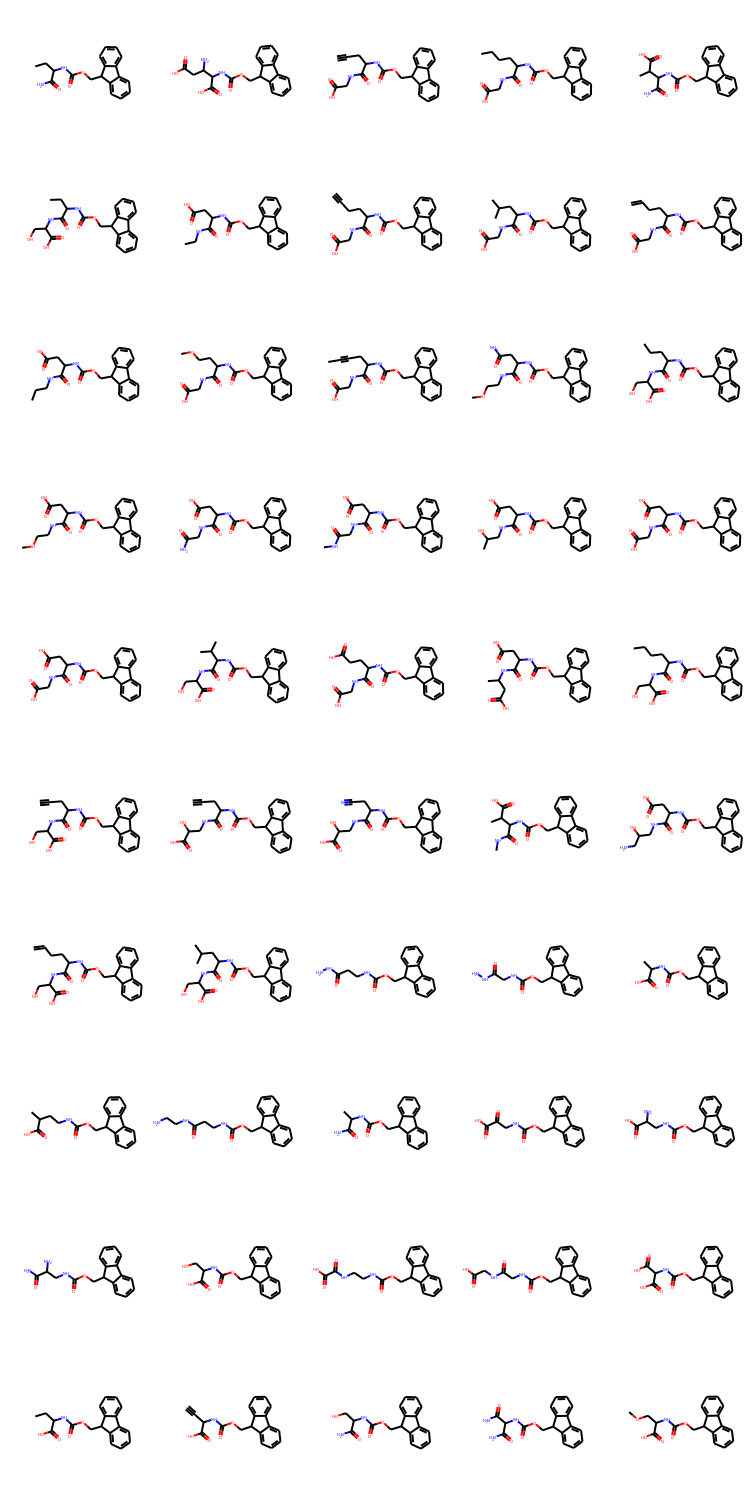

In [14]:
mf.paintmols(cl_smis_co[0])

In [11]:
# Keep molecules approx fitting the expected features: logP < 1 and similarity > 0.8, and paint them

good_mols = smidf.loc[(smidf.sim > 0.8) & (smidf.logp < 1), ["smiles","id","logp","mwt","sim"]]
good_mols.shape
good_mols

,smiles,id,logp,mwt,sim
48,NC(=O)CNC(=O)C(CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,s49,0.9699,411.414,0.859060
356,O=C(O)CC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)NCC(O)C(=O)O,s357,0.9301,442.424,0.857930
1169,O=C(NC(CC(=O)O)C(=O)NCC(O)C(=O)O)OCC1c2ccccc2-c2ccccc21,s1170,0.9301,442.424,0.857930
1836,O=C(NC(CC(=O)O)C(=O)NC(CO)C(=O)O)OCC1c2ccccc2-c2ccccc21,s1837,0.9301,442.424,0.850763
2509,NC(=O)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)NCC(O)C(=O)O,s2510,-0.0593,427.413,0.800436
2527,NCC(O)CNC(=O)C(CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,s2528,0.8042,427.457,0.851934


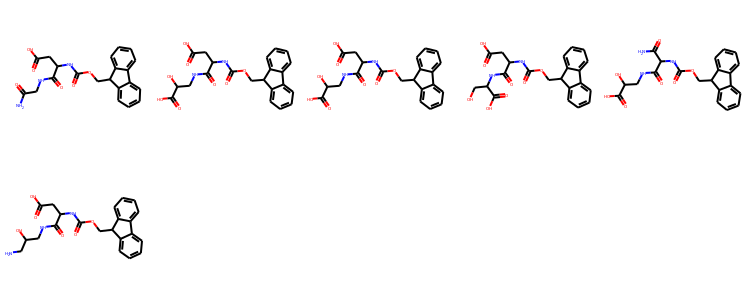

In [12]:
mf.paintmols(good_mols.smiles)

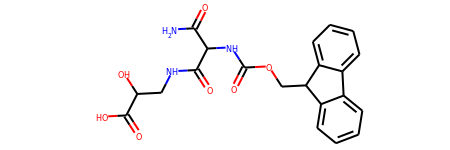

In [15]:
Chem.MolFromSmiles("NC(=O)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)NCC(O)C(=O)O")

In [13]:
# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp6Analysis execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))

Exp6Analysis execution time: 00:00:16
